In [138]:
#importing modules
import pandas as pd
import numpy as np
import networkx as nx
import pickle
from pyvis import network as net
import plotly.graph_objects as go

#import data from pickle
vmh_kg = nx.read_gpickle('./data/vmh_knowledgegraph.pkl')

#import metabolite csv
metb = pd.read_csv("./data/metabolites.csv", sep='\t', index_col=0)

#show all columns of pandas
pd.options.display.max_columns = None

In [139]:
#viewing node attributes
counter = 0
for n, data in vmh_kg.nodes.data():
    print(n)
    print(data)
    counter += 1 
    if counter == 10:
        break
        
print("Number of nodes: {}".format(vmh_kg.number_of_nodes()))

metr@10fthf5glu
{'name': '10fthf5glu', 'type': 'metr', 'pos': array([0.33851446, 0.0019751 ])}
metp@10fthf5glu
{'name': '10fthf5glu', 'type': 'metp', 'pos': array([0.10861233, 0.21251863])}
metr@10fthf6glu
{'name': '10fthf6glu', 'type': 'metr', 'pos': array([0.33850973, 0.00279864])}
metp@10fthf6glu
{'name': '10fthf6glu', 'type': 'metp', 'pos': array([0.3385066 , 0.00321455])}
metr@10fthf7glu
{'name': '10fthf7glu', 'type': 'metr', 'pos': array([0.33850294, 0.00363046])}
metp@10fthf7glu
{'name': '10fthf7glu', 'type': 'metp', 'pos': array([0.3384988 , 0.00404636])}
metr@10fthf
{'name': '10fthf', 'type': 'metr', 'pos': array([0.10619684, 0.24856102])}
metp@10fthf
{'name': '10fthf', 'type': 'metp', 'pos': array([0.17488699, 0.21029353])}
metr@nadph
{'name': 'nadph', 'type': 'metr', 'pos': array([0.16433931, 0.18456276])}
metp@nadp
{'name': 'nadp', 'type': 'metp', 'pos': array([0.12414202, 0.24062937])}
Number of nodes: 5151


In [140]:
#viewing edge attributes
counter = 0
blanks = 0
for n1, n2, data in vmh_kg.edges.data():
    if data:
        print(data)
        counter += 1
        if counter == 10:
            print(blanks)
            break
    else:
        blanks += 1
print(f"number of edges: {vmh_kg.number_of_edges()}")
print(f"number of blank edges: {blanks}")

number of edges: 274484
number of blank edges: 274484


EDGES ONLY INDICATE A CONNECTION

In [141]:
#Check the number of noes with no connection

c = 0
for n in vmh_kg.nodes():
    if not list(vmh_kg.neighbors(n)):
        c += 1

print(c)
    

3731


In [142]:
c = 0
for n1, n2, data in vmh_kg.edges.data():
    print(f"{n1}-{n2}")
    c += 1
    if c == 10:
        break

metp@10fthf5glu-mic@Staphylococcus_xylosus_DMB3_Bh1
metp@10fthf5glu-mic@Pseudomonas_monteilii_QM
metp@10fthf5glu-mic@Bilophila_wadsworthia_3_1_6
metp@10fthf5glu-mic@Peptostreptococcus_stomatis_DSM_17678
metp@10fthf5glu-mic@Parabacteroides_merdae_ATCC_43184
metp@10fthf5glu-mic@Bifidobacterium_scardovii_JCM_12489
metp@10fthf5glu-mic@Erysipelotrichaceae_bacterium_5_2_54FAA
metp@10fthf5glu-mic@Kurthia_massiliensis_JC30
metp@10fthf5glu-mic@Campylobacter_upsaliensis_JV21
metp@10fthf5glu-mic@Actinomyces_graevenitzii_C83


In [143]:
#check related metabolites of a given microbe
#returns list of related metabolites in the form of note name (met?@name)
#Raise networkx error if given mircrobe does not exist
#to dataframe > returns a DataFrame of related microbes and its description
    #if set to false > simply returns list
def related_metabolites(microbe, to_dataframe = False):
    if to_dataframe == False:
        l = [nbr for nbr in vmh_kg.neighbors(f"mic@{microbe}")] #list of related metabolite of a given microbe
        return l
    
    else:
        l = [nbr.split("@")[1] for nbr in vmh_kg.neighbors(f"mic@{microbe}")] #nbr takes the form of reactant/product@abbeviation
        #need to extract the abbreviation part to search through metabolites.csv
        df = pd.read_csv("./data/metabolites.csv", sep="\t", index_col = 0)
        r_metabolites = df[df.apply(lambda x: x["abbreviation"] in l, axis=1)]
        return r_metabolites
    
#Example usage
related_metabolites("Staphylococcus_xylosus_DMB3_Bh1", to_dataframe=True).head()

,met_id,abbreviation,createdDate,updatedDate,fullName,description,synonyms,iupac,neutralFormula,chargedFormula,charge,avgmolweight,monoisotopicweight,miriam,biggId,lmId,ehmnId,hepatonetId,keggId,pubChemId,cheBlId,chembl,inchiString,inchiKey,smile,hmdb,metanetx,seed,pdmapName,reconMap,reconMap3,golgimap,lysosomemap,mitochondrionmap,nucleusmap,peroxisomemap,reticulummap,food_db,chemspider,biocyc,wikipedia,drugbank,knapsack,phenolExplorer,metlin,casRegistry,epa_id,echa_id,iuphar_id,fda_id,mesh_id,chodb_id,isHuman,isMicrobe
0,4,10fthf,2018-05-31T15:54:08.170242Z,2019-02-08T16:20:18.422023Z,10-Formyltetrahydrofolate,Human Metabolome Database (HMDB): 10-Formyltet...,10-Formyl-THF***10-Formyltetrahydrofolic acid*...,"(2S)-2-[(4-{N-[(2-amino-4-oxo-1,4,5,6,7,8-hexa...",NaN,C20H21N7O7,-2,473.439300,473.165896,http://identifiers.org/vmhmetabolite/10fthf,10fthf,NaN,NaN,HC00212,C00234,122347.0,15637.0,NaN,InChI=1S/C20H23N7O7/c21-20-25-16-15(18(32)26-2...,AUFGTPPARQZWDO-YUZLPWPTSA-L,[H]OC1=NC(=NC2=C1N([H])C([H])(C([H])([H])N(C([...,HMDB0000972,MNXM237,cpd00201,NaN,10fthf,10fthf,NaN,10fthf,10fthf,NaN,NaN,NaN,FDB022345,109092.0,10-FORMYL-THF,10-formyl-tetrahydrofolate,NaN,NaN,NaN,5912.0,2800-34-2,NaN,NaN,NaN,NaN,NaN,10fthf,True,True
1,1,10fthf5glu,2018-05-31T15:54:08.170242Z,2019-02-01T14:33:17.460050Z,10-Formyltetrahydrofolate-[Glu](5),NaN,NaN,NaN,NaN,C40H45N11O19,-6,NaN,NaN,http://identifiers.org/vmhmetabolite/10fthf5glu,10fthf5glu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C40H51N11O19/c41-40-49-32-31(37(66)50...,RGSLBOWMZCMTRA-UHFFFAOYSA-H,[H]OC1=NC(=N[H])N([H])C2=C1N([H])C([H])(C([H])...,NaN,MNXM3428,NaN,NaN,10fthf5glu,10fthf5glu,NaN,10fthf5glu,10fthf5glu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10fthf5glu,True,True
55,254,13dpg,2018-05-31T15:54:08.170242Z,2019-02-08T16:20:45.306667Z,"Glyceric acid 1,3-biphosphate","Human Metabolome Database (HMDB): 1,3-Bisphosp...","1,3-Biphosphoglycerate***1,3-Biphosphoglyceric...",{[2-hydroxy-3-(phosphonooxy)propanoyl]oxy}phos...,NaN,C3H4O10P2,-4,266.037100,265.959270,http://identifiers.org/vmhmetabolite/13dpg,13dpg,NaN,NaN,HC00214,C00236,683.0,NaN,NaN,"InChI=1S/C3H8O10P2/c4-2(1-12-14(6,7)8)3(5)13-1...",LJQLQCAXBUHEAZ-UWTATZPHSA-J,[H]O[C@@]([H])(C(=O)OP([O-])([O-])=O)C([H])([H...,HMDB0001270,MNXM261,cpd00203,3-phospho-D-glyceroyl dihydrogen phosphate;D-g...,13dpg,13dpg,NaN,NaN,NaN,NaN,NaN,NaN,FDB022524,663.0,DPG,"1,3-Biphosphoglycerate",NaN,NaN,NaN,NaN,1981-49-3,NaN,NaN,NaN,NaN,NaN,13dpg,True,True
125,1074,1pyr5c,2018-05-31T15:54:08.170242Z,2019-02-01T14:33:29.349547Z,1-Pyrroline-5-Carboxylate,NaN,NaN,"(2S)-3,4-Dihydro-2H-pyrrole-2-carboxylic acid",NaN,C5H6NO2,-1,113.115997,113.047679,http://identifiers.org/vmhmetabolite/1pyr5c,1pyr5c,NaN,NaN,HC01199,C03912,1196.0,371.0,NaN,"InChI=1S/C5H7NO2/c7-5(8)4-2-1-3-6-4/h3-4H,1-2H...",DWAKNKKXGALPNW-UHFFFAOYSA-M,[H]C1=NC([H])(C([O-])=O)C([H])([H])C1([H])[H],NaN,MNXM1617,cpd02431,NaN,1pyr5c,1pyr5c,NaN,NaN,1pyr5c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64199-88-8,DTXSID10331473,NaN,NaN,NaN,NaN,1pyr5c,True,True
210,40,2dr1p,2018-05-31T15:54:08.170242Z,2019-02-08T16:20:52.816952Z,Deoxyribose 1-phosphate,Human Metabolome Database (HMDB): Deoxyribose ...,2-Deoxy-1-O-phosphono-D-erythro-pentofuranose*...,"{[(4S,5R)-4-hydroxy-5-(hydroxymethyl)oxolan-2-...",NaN,C5H9O7P,-2,214.110400,214.024239,http://identifiers.org/vmhmetabolite/2dr1p,2dr1p,NaN,NaN,HC00489,C00672,439287.0,28542.0,NaN,"InChI=1S/C5H11O7P/c6-2-4-3(7)1-5(11-4)12-13(8,...",KBDKAJNTYKVSEK-PYHARJCCSA-L,[H]OC([H])([H])[C@@]1([H])OC([H])(OP([O-])([O-...,HMDB0001351,MNXM789,cpd00509,NaN,2dr1p,2dr1p,NaN,NaN,NaN,NaN,NaN,NaN,FDB022571,388420.0,DEOXY-RIBOSE-1P,NaN,NaN,NaN,NaN,6182.0,17210-42-3,NaN,NaN,NaN,NaN,NaN,2dr1p,True,True


In [144]:
#check number of related metabolites of a given microbe
#Raise networkx error if the given microbe does not exist
def number_of_related_metabolites(microbe):
    number = len(related_metabolites(microbe))
    return number

#Example usage
print(number_of_related_metabolites("Staphylococcus_xylosus_DMB3_Bh1"))

#IMPORTANT
#NO. OF COLUMNS IN THE DATAFRAME WILL NOT MATCH WITH THE NUMBER OF METABOLITES IN THE LIST
#LIST MAY CONTAIN COPIES - SAME MOLECULES BUT SOME AS REACTANT AND SOME AS PRODUCT (METR@ AND METP@ RESPECTIVELY) 
#METABOLITES.CSV DOES NOT HAVE SUCH DISTINCTION, HENCE THE NUMBER OF ROWS BEING LOWER THAN THE NUMBER OF METABOLITES
#MAY CHANGE LATER

388


In [145]:
#Check related microbes of a given metabolite
#Returns list of related microbes
#Raise Networkx error of given node does not exist
#to dataframe > returns a DataFrame of related microbes and its description
    #if set to false > simply returns list
def related_microbes(form, metabolite, to_dataframe = False):
    node_name = form+"@"+metabolite
    l = [nbr.split("@")[1] for nbr in vmh_kg.neighbors(node_name)] #nbr has node with name: mic@NAME.
    if to_dataframe == False:
        return l
    else:
        df = pd.read_csv("./data/microbes.csv", sep="\t", index_col = 0)
        r_microbes = df[df.apply(lambda x: x["reconstruction"] in l, axis = 1)]
        
        return r_microbes
    
#Example usage
related_microbes("metr", "2hb", to_dataframe = True).head()

,reconstruction,createdDate,updatedDate,organism,seedid,kingdom,phylum,mclass,order,family,genus,oxygenstat,metabolism,gram,mtype,species,curationstatus,genes,reactions,metabolites,draftcreator,draftcreated,genomecompleteness,duplicatedgenes,phenotype,genomesize,imgid,ncbiid,goldId,uniProt,ensemblBacteria,ena,microbeWiki,platform,kbaseid,prevRef,currRef,scaffolds
1,Achromobacter_xylosoxidans_A8,2018-05-31T15:54:50.086322Z,2019-02-08T16:14:51.176225Z,Achromobacter xylosoxidans A8,Achromobacter xylosoxidans A8 (762376.5),Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Aerobe,Respiratory,Negative,NaN,Achromobacter xylosoxidans,"Literature based, semi-automatic curation Vers...",1663,1668,1229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762376.0,Go0007620,762376.0,Achromobacter_xylosoxidans_a8,GCA_000165835.1,NaN,ModelSEED,kb_g_3268_model_gf,NaN,NaN,NaN
2,Achromobacter_xylosoxidans_NBRC_15126,2018-05-31T15:54:50.086322Z,2019-02-08T16:14:51.635907Z,Achromobacter xylosoxidans NBRC 15126 = ATCC 2...,NaN,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Aerobe,Respiratory,Negative,NaN,Achromobacter xylosoxidans,"Literature based, semi-automatic curation Vers...",1380,1674,1216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1216976.0,NaN,1216976.0,Achromobacter_xylosoxidans_nbrc_15126_atcc_27061,GCA_000508285.1,NaN,Kbase,kb|g.208127,NaN,NaN,NaN
3,Acidaminococcus_fermentans_DSM_20731,2018-05-31T15:54:50.086322Z,2019-02-08T16:14:51.897149Z,Acidaminococcus fermentans DSM 20731,Acidaminococcus fermentans DSM 20731 (591001.3),Bacteria,Firmicutes,Negativicutes,Acidaminococcales,Acidaminococcaceae,Acidaminococcus,Obligate anaerobe,Fermentative,Negative,NaN,Acidaminococcus fermentans,"Literature based, semi-automatic curation Vers...",645,1102,905,Laura Kutt,04/17/16,NaN,NaN,NaN,2329769.0,646311901.0,591001.0,Go0001186,591001.0,Acidaminococcus_fermentans_dsm_20731,GCA_000025305.1,NaN,Kbase,kb|g.2555,NaN,NaN,1.0
6,Acinetobacter_baumannii_AB0057,2018-05-31T15:54:50.086322Z,2019-02-08T16:14:52.868834Z,Acinetobacter baumannii AB0057,Acinetobacter baumannii AB0057 (480119.5),Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Aerobe,Respiratory,Negative,NaN,Acinetobacter baumannii,"Literature based, semi-automatic curation Vers...",1021,1593,1181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480119.0,Go0000864,480119.0,Acinetobacter_baumannii_ab0057,GCA_000021245.1,Acinetobacter_baumannii,Kbase,kb|g.1744,NaN,NaN,NaN
7,Acinetobacter_calcoaceticus_PHEA_2,2018-05-31T15:54:50.086322Z,2019-02-08T16:14:53.082452Z,Acinetobacter calcoaceticus PHEA-2,Acinetobacter calcoaceticus PHEA-2 (871585.3),Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Aerobe,Respiratory,Negative,NaN,Acinetobacter calcoaceticus,"Literature based, semi-automatic curation Vers...",1026,1586,1164,Laura Kutt,04/18/16,NaN,NaN,NaN,3862530.0,650377903.0,871585.0,Go0008566,871585.0,Acinetobacter_pittii_phea_2,GCA_000191145,NaN,Kbase,kb|g.3519,NaN,NaN,1.0


In [146]:
#Check number of related microbes of a given metabolite
def number_of_related_microbes(form, metabolite):
    return len(related_microbes(form, metabolite))
    
#Example usage
print(number_of_related_microbes("metr", "2hb"))

359


TOOLS FOR TOTAL NUMBERS (RANKING)

In [147]:
#Rank microbes in terms of number of related mircrobes
#Returns list of (microbe, no. of related metabolite) tuple, sorted from highest to lowest
def rank_microbe():
    rank_list = []
    for n, data in vmh_kg.nodes.data():
        #iterate through microbe nodes
        #will change to more effective method later
        if data["type"] == "mic":
            name = data["name"]
            rank_list.append((name, number_of_related_metabolites(name)))
            
    #sort by number
    rank_list.sort(key = lambda x: x[1], reverse = True)
    
    return rank_list

#Usage
for top_microbe in rank_microbe()[:15]:
    print(f"{top_microbe[0]}:{top_microbe[1]}")

Klebsiella_oxytoca_KCTC_1686:463
Enterobacter_aerogenes_KCTC_2190:459
Enterobacter_asburiae_LF7a:454
Hafnia_alvei_BIDMC_31:449
Raoultella_planticola_ATCC_33531:448
Paenibacillus_graminis_C4D1M:447
Serratia_liquefaciens_ATCC_27592:446
Enterobacter_cloacae_EcWSU1:445
Yokenella_regensburgei_ATCC_43003:444
Serratia_marcescens_subsp_marcescens_Db11:442
Burkholderia_cepacia_GG4:442
Pseudomonas_nitroreducens_HBP1:441
Cronobacter_sakazakii_ATCC_BAA_894:439
Cedecea_davisae_DSM_4568:439
Achromobacter_xylosoxidans_A8:438


In [148]:
metb[metb["abbreviation"]=="10fthf"]["fullName"].values[0]

'10-Formyltetrahydrofolate'

In [149]:
#Rank metabolites in terms of number of related microbes
#default: all, regardless of type
#can filter only metr or metp
#put "metr" or "metp" as arguments for filtering
#will not rank metabolites with no related microbes

def rank_metabolites(filter = None):
    rank_list = []
    result = []
    
    if filter == None:
        for n, data in vmh_kg.nodes.data():
            if data["type"] != "mic":
                form = data['type']
                name = data['name']
                full = form + "@" + name                
                num = number_of_related_microbes(form, name)
                if num != 0: rank_list.append((full, num))
    else:
        for n, data in vmh_kg.nodes.data():
            if data["type"] == filter:
                name = data['name']
                form = data['type']
                num = number_of_related_microbes(form, name)
                if num != 0: rank_list.append((name, num))
                
    rank_list.sort(key = lambda x: x[1], reverse = True)
     
    return rank_list
    
#Usage
#rename abbreveation to full names
for top in rank_metabolites()[100:125]:
    abb = top[0].split("@")[1]
    rorp = top[0].split("@")[0]
    if rorp == "metp": rorp = "product"
    else: rorp = "reactant"
    fullName = metb[metb["abbreviation"]==abb]["fullName"].values[0]
    
    print(f"{fullName} as {rorp}: {top[1]}")

Tetrahydrofolic acid as reactant: 812
5-Phosphoribosylamine as product: 812
Uridine diphosphate-N-acetylglucosamine as reactant: 811
Guanosine triphosphate as product: 811
Uridine diphosphate-N-acetylgalactosamine as product: 811
Uridine diphosphate-N-acetylglucosamine as product: 811
N-Acetyl-glucosamine 1-phosphate as reactant: 811
10-Formyltetrahydrofolate as reactant: 810
dUDP as product: 810
Xanthylic acid as product: 808
Orotidylic acid as reactant: 808
Hydrogen carbonate as reactant: 805
dUMP as product: 805
L-Glutamine as product: 804
Glycerol 3-phosphate as reactant: 803
Carbamoyl phosphate as product: 802
Guanine as reactant: 802
Phosphoribosylformylglycineamidine as product: 802
5'-Phosphoribosyl-N-formylglycinamide as reactant: 802
Phosphoribosyl formamidocarboxamide as product: 801
Ureidosuccinic acid as product: 800
4,5-Dihydroorotic acid as reactant: 800
Oxalacetic acid as product: 799
AICAR as reactant: 799
Adenylsuccinic acid as product: 799


SIMPLE SEARCHING TOOLS - FOOD AND NUTRITIONAL DATA

In [150]:
#View connection between food and nutrients
#Search using food IDs - will expand the searching mechanism (search using food names)
#Returns pandas DataFrame conttaining Nutrients of given food
#Raise error if given food ID does not exist
#verbose[default=True]: if True, will return full dataframe. if False, returns "reduced" dataframe (less no. of columns)
def NutrientSearch(foodID, verbose=True):
    nutr = pd.read_csv("./data/nutritiondata.csv", sep="\t", index_col=0, low_memory=False)
    nutr_search = nutr.loc[nutr["food"] == foodID]
    assert nutr_search.empty is False #assert dataframe is not empty > if not raise error
    
    #columns used for verbose=False option
    simple_columns = ["food",  "description", "nutr_value", "unit", "category", "subcategory"]
    
    if verbose==True:
        return nutr_search
    else:
        nutr_search_simple = pd.DataFrame(nutr_search, columns=simple_columns)
        return nutr_search_simple
    
#Example
NutrientSearch("USDA01002", verbose=False)

#Algorithm slow > need improvement later on

,food,description,nutr_value,unit,category,subcategory
115,USDA01002,Protein,0.490,g,Proteins,Total protein
116,USDA01002,Total lipid (fat),78.300,g,Lipids,Total lipids
117,USDA01002,"Carbohydrate, by difference",2.870,g,Carbohydrates,Total carbohydrate
118,USDA01002,Ash,1.620,g,Minerals and trace elements,Ash
119,USDA01002,Energy,718.000,kcal,Energy content,Energy in kcal
...,...,...,...,...,...,...
241,USDA01002,"18:3 n-3 c,c,c (ALA)",0.285,g,Lipids,Fatty acid
242,USDA01002,20:3 n-3,0.005,g,Lipids,Fatty acid
243,USDA01002,20:3 n-6,0.081,g,Lipids,Fatty acid
244,USDA01002,18:3i,0.008,g,Lipids,Fatty acid


In [151]:
#view types of food products
def FoodTypes():
    food = pd.read_csv("./data/foods.csv", sep="\t", index_col=0)
    return food["product_type"].unique().tolist()

#Usage
for foodtype in FoodTypes():
    print(foodtype)

Dairy and Egg Products
Spices and Herbs
Baby Foods
Fats and Oils
Poultry Products
Soups, Sauces, and Gravies
Sausages and Luncheon Meats
Breakfast Cereals
Snacks
Fruits and Fruit Juices
Pork Products
Vegetables and Vegetable Products
Nut and Seed Products
Beef Products
Beverages
Finfish and Shellfish Products
Legumes and Legume Products
Lamb, Veal, and Game Products
Baked Products
Sweets
Cereal Grains and Pasta
Fast Foods
Meals, Entrees, and Side Dishes
American Indian/Alaska Native Foods
Restaurant Foods


In [152]:
#View Summary of foods.csv by product_type
#prints list of product types followed by the number of said type
def FoodSummary():
    food = pd.read_csv("./data/foods.csv", sep="\t", index_col=0)
    for foodtype in FoodTypes():
        print("Number of {}: {}".format(foodtype, len(food.loc[food["product_type"] == foodtype])))
    print("Total number of foods: {}".format(len(food)))

#Usage
FoodSummary()

Number of Dairy and Egg Products: 283
Number of Spices and Herbs: 64
Number of Baby Foods: 368
Number of Fats and Oils: 220
Number of Poultry Products: 389
Number of Soups, Sauces, and Gravies: 465
Number of Sausages and Luncheon Meats: 170
Number of Breakfast Cereals: 356
Number of Snacks: 177
Number of Fruits and Fruit Juices: 360
Number of Pork Products: 341
Number of Vegetables and Vegetable Products: 836
Number of Nut and Seed Products: 137
Number of Beef Products: 961
Number of Beverages: 371
Number of Finfish and Shellfish Products: 265
Number of Legumes and Legume Products: 381
Number of Lamb, Veal, and Game Products: 464
Number of Baked Products: 879
Number of Sweets: 360
Number of Cereal Grains and Pasta: 181
Number of Fast Foods: 363
Number of Meals, Entrees, and Side Dishes: 125
Number of American Indian/Alaska Native Foods: 165
Number of Restaurant Foods: 109
Total number of foods: 8790


In [153]:
#Search through type of food
#Returns pandas DataFrame of food with given product type
#Raise error of product type does not exist
#Verbose option for simpler DataFrame
def SearchFoodsByType(product_type, verbose = True):
    food = pd.read_csv("./data/foods.csv", sep="\t", index_col=0)
    food_search = food.loc[food["product_type"] == product_type]
    assert food_search.empty is False
    
    simple_columns = ["food_id", "name", "product_type", "n_factor", "pro_factor", "fat_factor", "cho_factor"]
    
    if verbose == True:
        return food_search
    
    else:
        return pd.DataFrame(food_search, columns=simple_columns)
    
#Usage
SearchFoodsByType("Dairy and Egg Products", verbose = False).head()

#Maybe Multiple queries next - TBD

,food_id,name,product_type,n_factor,pro_factor,fat_factor,cho_factor
0,USDA01001,"Butter, salted",Dairy and Egg Products,6.38,4.27,8.79,3.87
1,USDA01002,"Butter, whipped, with salt",Dairy and Egg Products,6.38,NaN,NaN,NaN
2,USDA01003,"Butter oil, anhydrous",Dairy and Egg Products,6.38,4.27,8.79,3.87
3,USDA01004,"Cheese, blue",Dairy and Egg Products,6.38,4.27,8.79,3.87
4,USDA01005,"Cheese, brick",Dairy and Egg Products,6.38,4.27,8.79,3.87


In [154]:
#View metabolites of given food
#if verbose = True: gives DataFrame with in-depth info about the metabolites
#if verbose = False: gives a simple dataframe of the abbreviation & metabolite id of the metabolites
#Raise error if the query does not exist

def MetaboliteSearch(foodID, verbose = False):
    df = pd.read_csv("./data/total/nut_met_relation.csv", sep="\t", index_col = 0) #this file only contains met_id and metabolite name
    search = df.loc[df["food_id"] == foodID]
    assert search.empty is False
    
    if verbose == False:
        return search
    
    else:
        met_id_list = search["met_id"].tolist()
        #get met info from metabolites.csv
        df2 = pd.read_csv("./data/metabolites.csv", sep = "\t", index_col = 0)
        search_v = df2[df2.apply(lambda x: x["met_id"] in met_id_list, axis=1)]
        result_id_list = search_v["met_id"].tolist()
        
        #print([item for item, count in collections.Counter(met_id_list).items() if count > 1])
        #there are duplicates in met_id_list (nut_met_relation.csv) - not sure how significant it is nor why there are such duplicates
        return search_v
    
#Usage
MetaboliteSearch("USDA01001", verbose=True)

,met_id,abbreviation,createdDate,updatedDate,fullName,description,synonyms,iupac,neutralFormula,chargedFormula,charge,avgmolweight,monoisotopicweight,miriam,biggId,lmId,ehmnId,hepatonetId,keggId,pubChemId,cheBlId,chembl,inchiString,inchiKey,smile,hmdb,metanetx,seed,pdmapName,reconMap,reconMap3,golgimap,lysosomemap,mitochondrionmap,nucleusmap,peroxisomemap,reticulummap,food_db,chemspider,biocyc,wikipedia,drugbank,knapsack,phenolExplorer,metlin,casRegistry,epa_id,echa_id,iuphar_id,fda_id,mesh_id,chodb_id,isHuman,isMicrobe
0,4,10fthf,2018-05-31T15:54:08.170242Z,2019-02-08T16:20:18.422023Z,10-Formyltetrahydrofolate,Human Metabolome Database (HMDB): 10-Formyltet...,10-Formyl-THF***10-Formyltetrahydrofolic acid*...,"(2S)-2-[(4-{N-[(2-amino-4-oxo-1,4,5,6,7,8-hexa...",NaN,C20H21N7O7,-2,473.4393,473.165896,http://identifiers.org/vmhmetabolite/10fthf,10fthf,NaN,NaN,HC00212,C00234,122347.0,15637.0,NaN,InChI=1S/C20H23N7O7/c21-20-25-16-15(18(32)26-2...,AUFGTPPARQZWDO-YUZLPWPTSA-L,[H]OC1=NC(=NC2=C1N([H])C([H])(C([H])([H])N(C([...,HMDB0000972,MNXM237,cpd00201,NaN,10fthf,10fthf,NaN,10fthf,10fthf,NaN,NaN,NaN,FDB022345,109092.0,10-FORMYL-THF,10-formyl-tetrahydrofolate,NaN,NaN,NaN,5912.0,2800-34-2,NaN,NaN,NaN,NaN,NaN,10fthf,True,True
624,133,5mthf,2018-05-31T15:54:08.170242Z,2019-02-08T16:20:55.780867Z,5-Methyltetrahydrofolic acid,Human Metabolome Database (HMDB): 5 methyltetr...,"5-Methyl tetrahydrofolate***5-Methyl-5,6,7,8-t...","N-(4-{[(2-Amino-4-hydroxy-5-methyl-5,6,7,8-tet...",NaN,C20H24N7O6,-1,459.4558,459.186632,http://identifiers.org/vmhmetabolite/5mthf,5mthf,NaN,NaN,HC00358,C00440,439234.0,15641.0,NaN,InChI=1S/C20H25N7O6/c1-27-12(9-23-16-15(27)18(...,ZNOVTXRBGFNYRX-ABLWVSNPSA-M,[H]OC(=O)C([H])([H])C([H])([H])[C@@]([H])(N([H...,HMDB0001396,MNXM318,cpd00345,NaN,5mthf,5mthf,NaN,NaN,NaN,NaN,NaN,NaN,FDB022600,388371.0,5-METHYL-THF,5-Methyltetrahydrofolate,DBMET00528,C00007252,NaN,6215.0,134-35-0,DTXSID4048278,NaN,NaN,NaN,NaN,5mthf,True,True
801,558,adocbl,2018-05-31T15:54:08.170242Z,2019-02-08T16:21:21.610001Z,Adenosylcobalamin,Human Metabolome Database (HMDB): Adenosylcoba...,"(5,6-Dimethylbenzimidazolyl)cobamide coenzyme*...",-,NaN,C72H100CoN18O17P,0,1579.5818,1578.658346,http://identifiers.org/vmhmetabolite/adocbl,adocbl,NaN,NaN,NaN,C00194,5459907.0,18408.0,NaN,InChI=1S/C62H90N13O14P.C10H12N5O3.Co/c1-29-20-...,ZIHHMGTYZOSFRC-OUCXYWSSSA-L,[N+]12=C3[C@](C([H])([H])C([H])([H])C(=O)N([H]...,HMDB0002086,MNXM90703,cpd00166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FDB022837,16736117.0,ADENOSYLCOBALAMIN-5-P,Adenosylcobalamin,NaN,NaN,NaN,NaN,13870-90-1,DTXSID1046009,100.034.192,NaN,NaN,NaN,adocbl,True,True
849,367,ala_D,2018-05-31T15:54:08.170242Z,2019-02-08T16:20:48.522209Z,D-Alanine,Human Metabolome Database (HMDB): Alanine is a...,(2R)-2-Aminopropanoic acid***(R)-2-Aminopropan...,D-Alanine,NaN,C3H7NO2,0,89.0932,89.047678,http://identifiers.org/vmhmetabolite/ala_D,ala__D,NaN,NaN,NaN,C00133,71080.0,15570.0,NaN,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",QNAYBMKLOCPYGJ-UWTATZPHSA-N,[H]C([H])([H])[C@]([H])(C([O-])=O)[N+]([H])([H...,HMDB0001310,MNXM156,cpd00117,NaN,ala_D,ala_D,NaN,NaN,NaN,NaN,ala_D,NaN,FDB022546,64234.0,D-ALANINE,D-Alanine,NaN,C00019654,NaN,NaN,338-69-2,DTXSID3045649,NaN,NaN,NaN,NaN,ala_D,True,True
850,343,ala_L,2018-05-31T15:54:08.170242Z,2019-02-08T16:19:24.220194Z,L-Alanine,Human Metabolome Database (HMDB): Alanine is a...,(2S)-2-Aminopropanoic acid***(S)-2-Aminopropan...,Alanine,NaN,C3H7NO2,0,89.0932,89.047678,http://identifiers.org/vmhmetabolite/ala_L,ala__L,NaN,NaN,HC00048,C00041,5950.0,16977.0,CHEMBL66693,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",QNAYBMKLOCPYGJ-REOHCLBHSA-N,[H]C([H])([H])[C@@]([H])(C([O-])=O)[N+]([H])([...,HMDB0000161,MNXM32,cpd00035,NaN,ala_L,ala_L,NaN,NaN,ala_L,NaN,ala_L,NaN,FDB000556,5735.0,L-ALPHA-ALANINE,2-Aminopropanoic acid,NaN,C00001332,NaN,NaN,56-41-7,DTXSID6031255,100.000.249,720.0,1FU7983T0U,NaN,ala_L,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

FOOD - METABOLITE - MICROBE PATH

In [155]:
#Very rudimentary function that connects food with microbes
#food > related metabolite > related microbe path
#counts the number of times each microbes were called
#returns list of microbes, from most counted to least counted
from collections import Counter

def SimpleMicrobeCounter(foodID):
    df = MetaboliteSearch(foodID, verbose=False)
    beeg_microbe_list = []
    result = []
    met_list = df["met_abb"].unique().tolist()
    for metabolite in met_list:
        try:
            r_microbes_metp=related_microbes("metp", metabolite, to_dataframe=False)
        except:
            r_microbes_metp = []
        beeg_microbe_list += r_microbes_metp
            
        try:
            r_microbes_metr = related_microbes("metr", metabolite, to_dataframe=False)
        except:
            r_microbes_metr = []
        beeg_microbe_list += r_microbes_metr
        
    for microbe, count in Counter(beeg_microbe_list).items():
        result.append((microbe, count))
        
    #sort result
    result.sort(key= lambda x: x[1], reverse=True)
        
    return result

#Usage
for counts in SimpleMicrobeCounter("USDA01001")[:15]:
    print(f"{counts[0]}:{counts[1]}")

Pseudomonas_aeruginosa_NCGM2_S1:62
Fusobacterium_varium_ATCC_27725:62
Fusobacterium_ulcerans_ATCC_49185:61
Klebsiella_sp_1_1_55:61
Delftia_acidovorans_SPH_1:60
Providencia_rustigianii_DSM_4541:60
Klebsiella_pneumoniae_pneumoniae_MGH78578:60
Enterobacteriaceae_bacterium_9_2_54FAA:60
Pseudomonas_monteilii_NBRC_103158:59
Brevibacillus_brevis_NBRC_100599:59
Edwardsiella_tarda_FL6_60:59
Providencia_rettgeri_DSM_1131:59
Providencia_stuartii_ATCC_25827:59
Citrobacter_youngae_ATCC_29220:59
Providencia_alcalifaciens_DSM_30120:59


Creating New CSV Files

In [156]:
##Create Nutrient Pivot Table##
nutr = pd.read_csv("./data/nutritiondata.csv", sep='\t', index_col=0, low_memory=False)
pr_nutr = nutr[["food", "source", "nutr_value", "unit", "tag_name", "description", 
                "common_name", "num_dec", "sr_order", "category", "subcategory"]]  

#Change into pivot table with foodID as index
pr_nutr = pr_nutr[pr_nutr.unit != "kJ"] #drop rows with Energy(kJ) info - redundant
nutr_table = pd.pivot_table(pr_nutr, index="food", values = "nutr_value", columns = "description")

#simpler pivot table (only total values & energy)
simple_table_cols = ["Protein", "Total lipid (fat)", "Carbohydrate, by difference", "Ash", "Alcohol, ethyl", "Water", "Caffeine", "Theobromine", "Energy"]
nutr_table_simple = nutr_table[simple_table_cols]
#rename columns with units
units = ["g", "g", "g", "g", "g", "g", "mg", "mg", "kcal"]
new_col = {simple_table_cols[i]: simple_table_cols[i]+f" ({units[i]})" for i in range(9)}
nutrition_table = nutr_table_simple.rename(columns = new_col)

#fill NaN with 0
nutrition_table_fillna = nutrition_table.fillna(0)

#Add food name
food = pd.read_csv("./data/foods.csv", sep='\t', index_col=0)

def FoodName(row):
    r = food.loc[food["food_id"] == row.name, "name"].values[0]
    return r

nutrition_table_fillna["Name"] = nutrition_table_fillna.apply(FoodName, axis=1)

#Move Cols then Save
cols = nutrition_table_fillna.columns.tolist()
cols = ["Name"] + cols[:-1]
nutrition_table_fillna = nutrition_table_fillna[cols]
nutrition_table_fillna.to_csv("./data/Nutrition_Table.csv")

nutrition_table_fillna.head()

description,Name,Protein (g),Total lipid (fat) (g),"Carbohydrate, by difference (g)",Ash (g),"Alcohol, ethyl (g)",Water (g),Caffeine (mg),Theobromine (mg),Energy (kcal)
food,,,,,,,,,,
USDA01001,"Butter, salted",0.85,81.11,0.06,2.11,0.0,15.87,0.0,0.0,717.0
USDA01002,"Butter, whipped, with salt",0.49,78.30,2.87,1.62,0.0,16.72,0.0,0.0,718.0
USDA01003,"Butter oil, anhydrous",0.28,99.48,0.00,0.00,0.0,0.24,0.0,0.0,876.0
USDA01004,"Cheese, blue",21.40,28.74,2.34,5.11,0.0,42.41,0.0,0.0,353.0
USDA01005,"Cheese, brick",23.24,29.68,2.79,3.18,0.0,41.11,0.0,0.0,371.0


In [157]:
#Enhance Food.csv with Nutrient information
#Merge nutrition table with food.csv
simple_food = food[["food_id", "name", "product_type", "n_factor", "pro_factor", "fat_factor", "cho_factor"]]
food_nutrient_info = nutrition_table_fillna.drop(columns="Name")
enhanced_food_csv = pd.concat([simple_food, food_nutrient_info.reset_index().drop(columns="food")], axis=1)

#save csv
enhanced_food_csv.to_csv("./data/EnhancedFood.csv")
enhanced_food_csv.head()

,food_id,name,product_type,n_factor,pro_factor,fat_factor,cho_factor,Protein (g),Total lipid (fat) (g),"Carbohydrate, by difference (g)",Ash (g),"Alcohol, ethyl (g)",Water (g),Caffeine (mg),Theobromine (mg),Energy (kcal)
0,USDA01001,"Butter, salted",Dairy and Egg Products,6.38,4.27,8.79,3.87,0.85,81.11,0.06,2.11,0.0,15.87,0.0,0.0,717.0
1,USDA01002,"Butter, whipped, with salt",Dairy and Egg Products,6.38,NaN,NaN,NaN,0.49,78.30,2.87,1.62,0.0,16.72,0.0,0.0,718.0
2,USDA01003,"Butter oil, anhydrous",Dairy and Egg Products,6.38,4.27,8.79,3.87,0.28,99.48,0.00,0.00,0.0,0.24,0.0,0.0,876.0
3,USDA01004,"Cheese, blue",Dairy and Egg Products,6.38,4.27,8.79,3.87,21.40,28.74,2.34,5.11,0.0,42.41,0.0,0.0,353.0
4,USDA01005,"Cheese, brick",Dairy and Egg Products,6.38,4.27,8.79,3.87,23.24,29.68,2.79,3.18,0.0,41.11,0.0,0.0,371.0


HISTOGRAMS

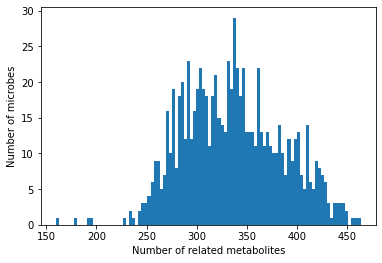

In [158]:
#Histogram of microbes (related metabolites)
import matplotlib.pyplot as plt
mich = [x[1] for x in rank_microbe()]
n_bins=100
plt.hist(mich, n_bins)
plt.xlabel("Number of related metabolites")
plt.ylabel("Number of microbes")
plt.show()

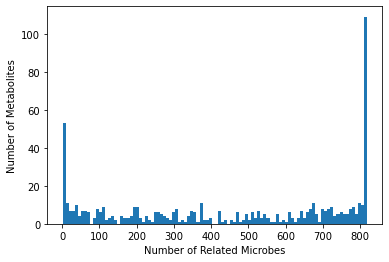

In [160]:
meth = [x[1] for x in rank_metabolites()]
plt.clf()
plt.hist(meth, n_bins)
plt.xlabel("Number of Related Microbes")
plt.ylabel("Number of Metabolites")
plt.show()

There are over 140 metabolites with over 800 related microbes - this is due to because a lot of the metabolites are "redundant", such as water, or nadh. These metabolites are highly likely to be related to most microbes, and does not give any useful information. We can easily see this by looking at the top 20 results of the list:

In [161]:
related_microbes_list = rank_metabolites()
for mets in related_microbes_list[:20]:
    abb = mets[0].split("@")[1]
    rorp = mets[0].split("@")[0]
    if rorp == "metp": rorp = "product"
    else: rorp = "reactant"
    fullName = metb[metb["abbreviation"]==abb]["fullName"].values[0]
    
    print(f"{fullName} as {rorp}: {mets[1]}")

Water as product: 818
Hydrogen Ion as reactant: 818
Hydrogen Ion as product: 818
Phosphate as product: 818
ADP as product: 818
Water as reactant: 818
Adenosine triphosphate as reactant: 818
Ammonia as product: 818
NADH as product: 818
NAD as reactant: 818
Carbon dioxide as product: 818
Coenzyme A as product: 818
L-Glutamic acid as product: 818
Pyrophosphate as product: 818
Adenosine monophosphate as product: 818
FAD as product: 818
Flavin Mononucleotide as reactant: 818
Adenosine monophosphate as reactant: 818
Guanosine diphosphate as product: 818
Glycine as product: 818


H20, H, Pi are obviously highly redundant, and energy sources such as gtp or atp gives us little knowledge. Anything related to the microbes own transcription/translation does not have a significant impact on human-microbiome interaction, so it is necessary to remove those as well. Also, The maximum number of related microbes possible is:

In [162]:
c = 0
for n, data in vmh_kg.nodes.data():
    if data["type"] == "mic": c += 1
print(c)

818


Therefore I have decided to remove all instances of metabolites with 818 related microbes, which leads to the histogram below:

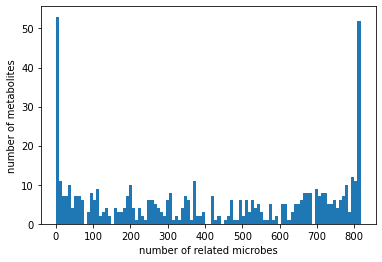

In [163]:
prc_met = [x[1] for x in related_microbes_list if x[1]!=818]

plt.clf()
plt.hist(prc_met, n_bins)
plt.xlabel("number of related microbes")
plt.ylabel("number of metabolites")
plt.show()

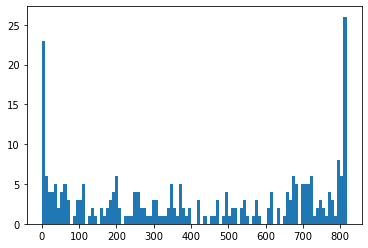

In [164]:
#Reactant - product seperation
met_r = rank_metabolites("metp")
met_p = rank_metabolites("metr")
met_r = [x for x in met_r if x[1] !=818]
met_p = [x for x in met_p if x[1] !=818]

#Reactant Histogram
metr_h = [x[1] for x in met_r]
plt.hist(metr_h, n_bins)
plt.show()

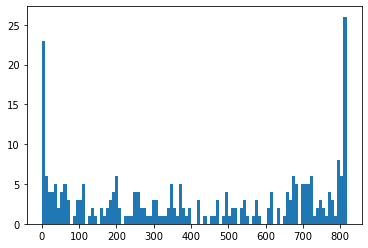

In [165]:
#Product Histogram
metp_h = [x[1] for x in met_p]
plt.clf()
plt.hist(metr_h, n_bins)
plt.show()

VISUALIZING THE NETWORK

In [166]:
#make copy of the network; remove solitary nodes (no neighbors)
G = vmh_kg.copy()
nodes_to_remove = []
for n in G.nodes():
    if not list(G.neighbors(n)): nodes_to_remove.append(n)
    
#print(nodes_to_remove)

for node in nodes_to_remove:
    G.remove_node(node)

print(G.number_of_nodes())

1420


In [167]:
#visualize via plotly
#creates interactive html file - hovering over node gives the node name and the number of connections
def visualize_graph(G, name = "metabolite_microbe_connection"):
    #Add edge info to graph
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    #add node info to graph
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x = node_x, y = node_y,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            showscale = True,
            colorscale = 'YlGnBu',
            reversescale = True,
            color = [],
            size = 10,
            colorbar = dict(
                thickness = 15,
                title = 'Node Connections',
                xanchor = 'left',
                titleside = 'right'
            ),
            line_width = 2))


    #color nodes by no. of adjacencies
    node_adjacencies = []
    node_text = []
    for node, adj in enumerate(G.adjacency()):
        node_adjacencies.append(len(adj[1]))
        node_text.append(f'{str(adj[0])}:#of connections: {len(adj[1])}')

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    #Create graph(figure)
    fig = go.Figure(data = [edge_trace, node_trace], 
                    layout = go.Layout(
                        title = '<br>Metabolite-Microbe Network',
                        titlefont_size = 16,
                        showlegend = False,
                        hovermode = 'closest',
                        margin = dict(b=20, l=5, r=5, t=40),
                        #annotations = []
                        xaxis = dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis = dict(showgrid=False, zeroline=False, showticklabels=False))
                   )

    print("Graph visualization complete. creating html...")
    #Save as interactive html file
    fig.write_html(f'{name}.html')
    print("html file created. All processes complete.")
    

#testing    
#visualize_graph(G)

In [178]:
#Function for creating subgraphs - the original graph may be too big to analyse.
#input: microbe list, metabolite list
#top: only include top n microbes/metabolites (ranked by number of related microbes/metabolites)
def create_subgraph(microbes = [], metabolites = [], top = None):
    nodes = []
    buf = []
    if microbes and not metabolites: #input contains only microbes 
        for microbe in microbes:
            nodename = "mic@" + microbe
            nodes.append(nodename)
            for nbr in vmh_kg.neighbors(nodename):
                nodes.append(nbr)
            nodes = list(set(nodes))
        return vmh_kg.subgraph(nodes)
    
    elif not microbes and metabolites: #input contains only metabolites
        metps = ["metp@"+metabolite for metabolite in metabolites]
        metrs = ["metr@"+metabolite for metabolite in metabolites]
        for metp in metps:
            if metp in vmh_kg:
                nodes.append(metp)
                for nbr in vmh_kg.neighbors(metp):
                    buf.append(nbr)
            else: continue
        for metr in metrs:
            if metr in vmh_kg:
                nodes.append(metr)
                for nbr in vmh_kg.neighbors(metr):
                    buf.append(nbr)
            else: continue
        buf = list(set(buf))
        
        if top:
            buf.sort(key = lambda x: number_of_related_metabolites(x.split("@")[1]), reverse=True)
            nodes += buf[:int(top)]
        
        else: nodes += buf
            
        return vmh_kg.subgraph(nodes)
    
    elif microbes and metabolites:
        metps = ["metp@"+metabolite for metabolite in metabolites]
        metrs = ["metr@"+metabolite for metabolite in metabolites]
        nodes += ["mic@"+microbe for microbe in microbes]
        for metp in metps:
            if metp in vmh_kg: nodes.append(metp)
        for metr in metrs:
            if metr in vmh_kg: nodes.append(metr)
        return vmh_kg.subgraph(nodes)
    else:
        print("ERROR: Please choose at least one microbe/metabolite as input")
        return None

#SG = create_subgraph(microbes = ["Staphylococcus_xylosus_DMB3_Bh1"])
#visualize_graph(SG, "subgraphtest")

SG2 = create_subgraph(metabolites = ["ala_L", "pydam", "for"], top=20)
visualize_graph(SG2, "subgraphtest_3")

Graph visualization complete. creating html...
html file created. All processes complete.
